# EXAMPLE: Finding the turning points and predicting motion from the conservation of energy with Python

Consider the potential
$$V(x) = \frac{a}{x} + b x^2 - c x^3,$$

with $a = 4~\rm{Jm}, \; b = 25 ~\mathrm{Jm}^{-2}, \;c = 8 ~\mathrm{Jm}^{-3}$ and $x>0$.

We will see how to use what we learned so far in the python crash course to:

* Find the equibrium points
* Classify the equilibrium points according to their stability
* Find the parabolic approximation about each stable equilibrium point.
* Plot, the equilibrium points and the parabolic approximation(s).
 
## Equilibrium points
We start by defining the symbols and functions. `V` is the potential in its general form. In `Vp` we substitute the values for `a`, `b`, and `c` using subs.

In [1]:
import sympy as sy

x = sy.Symbol('x', positive=True, real=True)
a,b,c = sy.symbols('a, b, c', positive=True , real=True)
V = sy.Function('V')
V = a/x + b*x**2 - c*x**3
Vp = V.subs(a, 4).subs(b, 25).subs(c, 8)

The equilibrium points are found by setting $\dfrac{dV}{dx} = 0$.

In [2]:
Eq = sy.Eq(Vp.diff(x), 0)
Eq_points = sy.solve(Eq, x)

Recall that we use `sy.solve` by giving it the equation we need to solve (`Eq`), followed by the variable we wish to find (in this case, `x`). If you try to print the equilibrium points you will get some enormously long expressions with continued fractions. We don't really care about that, we want a number, so we use the function `sy.N()` to covert our long expressions into numbers:

In [3]:
print(sy.N(Eq_points[0]), sy.N(Eq_points[1]))

2.06438923261828 0.469134342329583


Bear in mind that in general, you will not necessarily have only two equilibrium points. To classify the equilibrium points we look at whether $\dfrac{d^2V}{dx^2}$ is positive (stable) or negative (unstable):

In [4]:
d2Vdx2 = Vp.diff(x, 2)
for point in Eq_points:
    val = d2Vdx2.subs(x, point)
    print(sy.N(point), sy.N(val))

2.06438923261828 -48.1813663313549
0.469134342329583 104.963103136360


This tells us that the equilibrium point at 2.06m is unstable, and the point at 0.47m is stable. 

Let's visualise the results we have so far. To do that, we use lambdify to create a numerical function for the potential `Vp`. Then we will create an array of values for $x$, and plot the potential, and the equilibrium points:

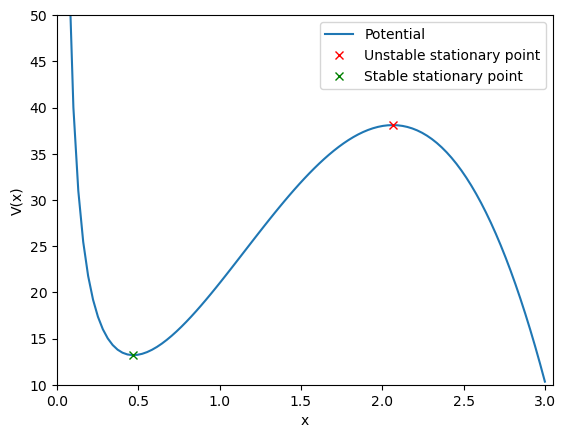

In [5]:
import numpy as np
import matplotlib.pyplot as plt

potential = sy.lambdify([x], Vp)

xs = np.linspace(0.01, 3, 100)
plt.plot(xs, potential(xs), label='Potential')
plt.plot(Eq_points[0], potential(Eq_points[0]),'rx', label='Unstable stationary point')
plt.plot(Eq_points[1], potential(Eq_points[1]),'gx', label='Stable stationary point')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.xlim(0, 3.05)
plt.ylim(10, 50)
plt.legend()

---

## Parabolic approximation at the equilibrium point (optional)
To find the parabolic approximation at the equilibrium point, we use the series function to obtain the first two terms of the Taylor expansion around the equilibrium point.



In [6]:
tayl_2 = sy.series(Vp, x, sy.N(Eq_points[1], 3))
sy.pprint(tayl_2)

                                                                              
                       2                   3                    4             
13.2 + 52.5⋅(x - 0.469)  - 90.6⋅(x - 0.469)  + 176.0⋅(x - 0.469)  - 376.0⋅(x -
                                                                              

                        ⎛         6         ⎞
       5                ⎜⎛    281⎞       281⎟
 0.469)  - 0.00391⋅x + O⎜⎜x - ───⎟ ; x → ───⎟
                        ⎝⎝    599⎠       599⎠


This looks confusing at first. The first two terms are the terms we actually want, the constant and quadratic terms. The third term is the linear ($x$) term, but it is negligibly small. We expect this linear term to be zero because by definition, at the equilibrium point, the first derivative is zero. The fact that it's not exactly zero is just a consequence of the way computers store numbers. The last term is the "Big O" notation, which can intuitively be thought of as representing all terms of powers greater than 2. Thus we will use the first two terms to define our parabolic (quadratic) approximation. 

To get just the first two terms in the list `tayl_2`, we use the args attribute. The first argument is `tayl_2.args[0]` etc.

In [7]:
parabolic_approx = tayl_2.args[0] + tayl_2.args[1]
sy.pprint(parabolic_approx)

                2       
52.5⋅(x - 0.469)  + 13.2


Finally, we use the `lambdify` function to get a numerical function for the parabolic approximation for the potential, just like we did with the full potential earlier on. We'll plot that alongside the full potential and the stable equilibrium point:

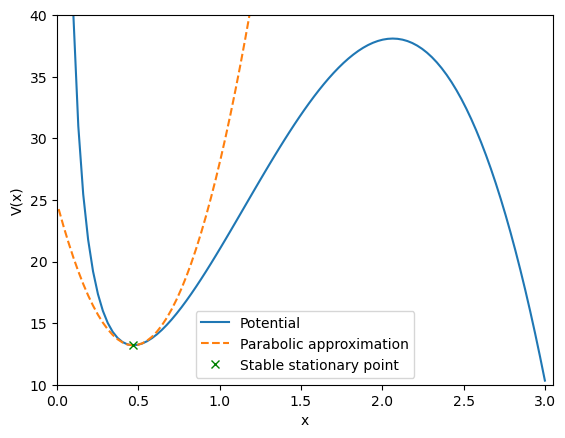

In [8]:
approx_potential = sy.lambdify([x], parabolic_approx)
xs = np.linspace(0.01, 3, 100)
plt.plot(xs, potential(xs), label='Potential')
plt.plot(xs, approx_potential(xs), '--', label='Parabolic approximation')
plt.plot(Eq_points[1], potential(Eq_points[1]),'gx', label='Stable stationary point')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.xlim(0, 3.05)
plt.ylim(10, 40)
plt.legend()

From the plot, one can see that the farther from the equilibrium point the more unreliable is the parabolic approximation.